<a href="https://colab.research.google.com/github/shn522-BYJ/Group6_infec/blob/main/Group6_0121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.谁最活跃

In [5]:
import pandas as pd

# 加载文件
articles_df = pd.read_csv('/content/drive/MyDrive/Group 6/articles.schistosomiasis.csv')
authors_df = pd.read_csv('/content/drive/MyDrive/Group 6/authors.schistosomiasis.csv')
paper_counts_df = pd.read_csv('/content/drive/MyDrive/Group 6/paper_counts.csv')

# 研究活动分析
author_activity = authors_df.groupby('AuthorLastname').size().reset_index(name='PublicationCount')
top_active_authors = author_activity.sort_values(by='PublicationCount', ascending=False).head(20)

# 显示前20名活跃研究者
print("Top 20 Active Researchers in Schistosomiasis:")
print(top_active_authors)

Top 20 Active Researchers in Schistosomiasis:
      AuthorLastname  PublicationCount
7952              Li              1327
14415           Wang              1228
15273          Zhang              1194
8071             Liu               788
2773            Chen               707
15340           Zhou               702
14817             Xu               614
14909           Yang               587
14676             Wu               477
15341            Zhu               406
6293           Huang               320
6706           Jiang               319
15276           Zhao               285
6274              Hu               283
2465             Cao               259
5093             Gao               254
15099             Yu               250
8192              Lu               247
5978              He               246
8034             Lin               244


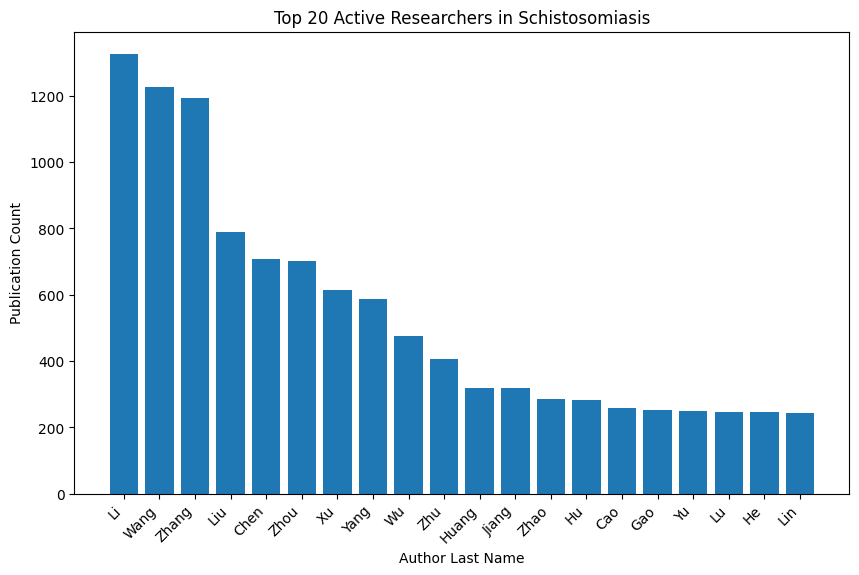

In [6]:
 #可视化
 import matplotlib.pyplot as plt

 # 绘制活跃研究人员的柱状图
plt.figure(figsize=(10, 6))
plt.bar(top_active_authors['AuthorLastname'], top_active_authors['PublicationCount'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Active Researchers in Schistosomiasis')
plt.xlabel('Author Last Name')
plt.ylabel('Publication Count')
plt.show()

2.这些最活跃的与谁合作频率多

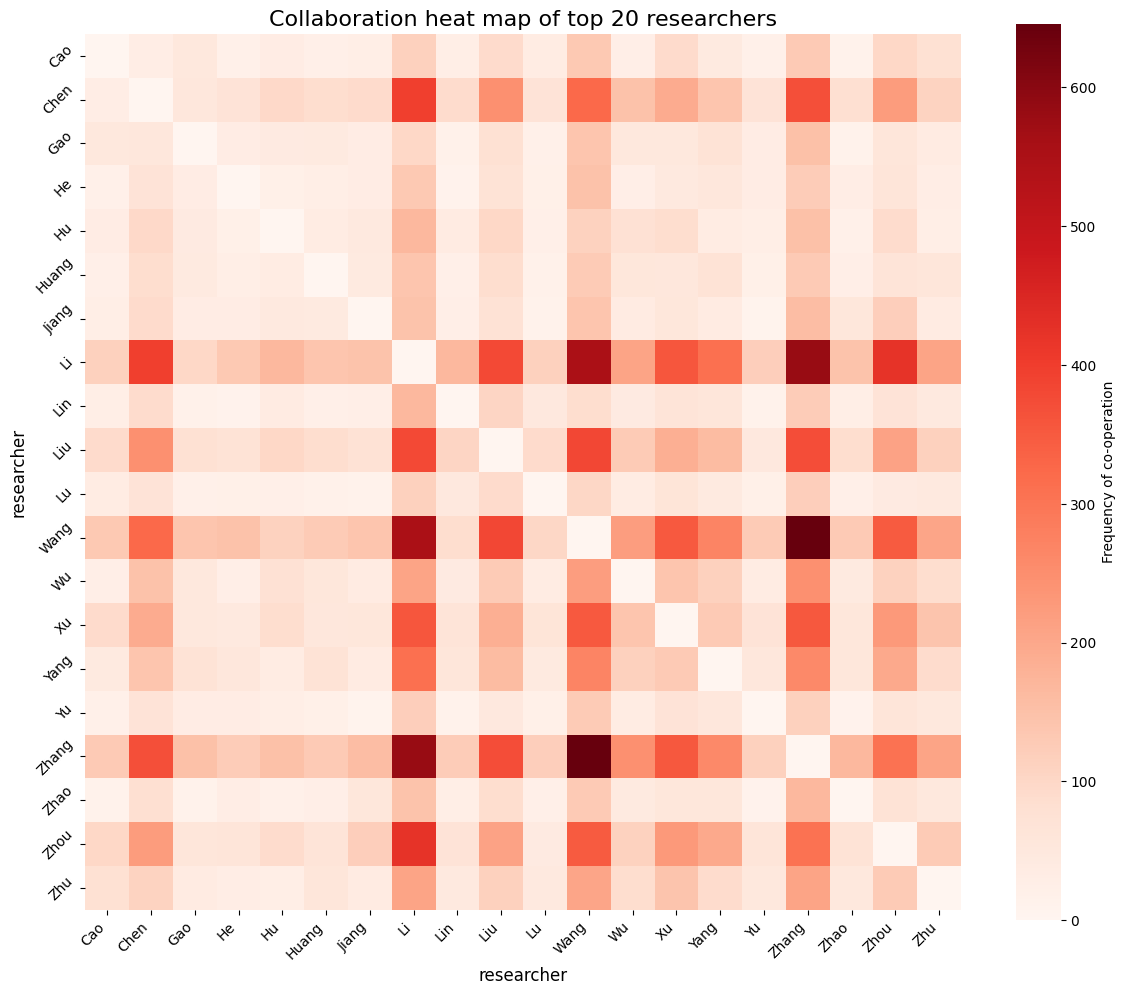

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 获取前20名活跃研究人员
author_activity = authors_df.groupby('AuthorLastname').size().reset_index(name='PublicationCount')
top_active_authors = author_activity.sort_values(by='PublicationCount', ascending=False).head(20)
top_authors = top_active_authors['AuthorLastname'].tolist()

# 筛选与前20名作者相关的合作数据
top_authors_data = authors_df[authors_df['AuthorLastname'].isin(top_authors)]

# 构建合作频率统计
cooperation = (
    top_authors_data.merge(top_authors_data, on='PMID')
    .query('AuthorLastname_x != AuthorLastname_y')
    .groupby(['AuthorLastname_x', 'AuthorLastname_y'])
    .size()
    .reset_index(name='CollaborationCount')
)

# 构建合作矩阵
cooperation_matrix = cooperation.pivot(
    index='AuthorLastname_x', columns='AuthorLastname_y', values='CollaborationCount'
).fillna(0)

# 绘制热力图
plt.figure(figsize=(12, 10))
sns.heatmap(
    cooperation_matrix,
    annot=False,
    cmap="Reds",
    square=True,
    cbar_kws={'label': 'Frequency of co-operation'}
)
plt.title("Collaboration heat map of top 20 researchers", fontsize=16)
plt.xlabel("researcher", fontsize=12)
plt.ylabel("researcher", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()